**Import Necessary Libraries**

In [ ]:
# import libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

**Load and Inspect the Dataset**

In [36]:
# Load the dataset
df = pd.read_csv('bank.csv', sep=';')

# Print columns of the dataset
print("Dataset columns:")
print(df.columns)

# Print the first few rows of the dataset
print(df.head())


Dataset columns:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199

**Prepare the Data**

In [37]:
# Define features and target variable
X = df.drop(columns=['y'])
y = df['y']

# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
X_encoded = pd.get_dummies(X, columns=categorical_cols)
print(X_encoded.head())  # Print first few rows to verify encoding


   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   30     1787   19        79         1     -1         0       False   
1   33     4789   11       220         1    339         4       False   
2   35     1350   16       185         1    330         1       False   
3   30     1476    3       199         4     -1         0       False   
4   59        0    5       226         1     -1         0       False   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False       True   
2            False             False  ...      False      False      False   
3            False             False  ...       True      False      False   
4             True             False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0      False       T

**Split Data into Training and Testing Sets**

In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


**Initialize and Train the Decision Tree Classifier**

In [39]:
# Initialize and train the decision tree classifier with further simplified parameters
clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,        # Reduce depth for simplicity
    min_samples_split=30,  # Increase to reduce splits
    min_samples_leaf=20    # Increase to ensure each leaf has more samples
)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=30,
                       random_state=42)

**Predict and Evaluate the Model**

In [40]:
# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8961325966850828

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94       807
         yes       0.54      0.29      0.37        98

    accuracy                           0.90       905
   macro avg       0.73      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



**Visualize the Decision Tree**

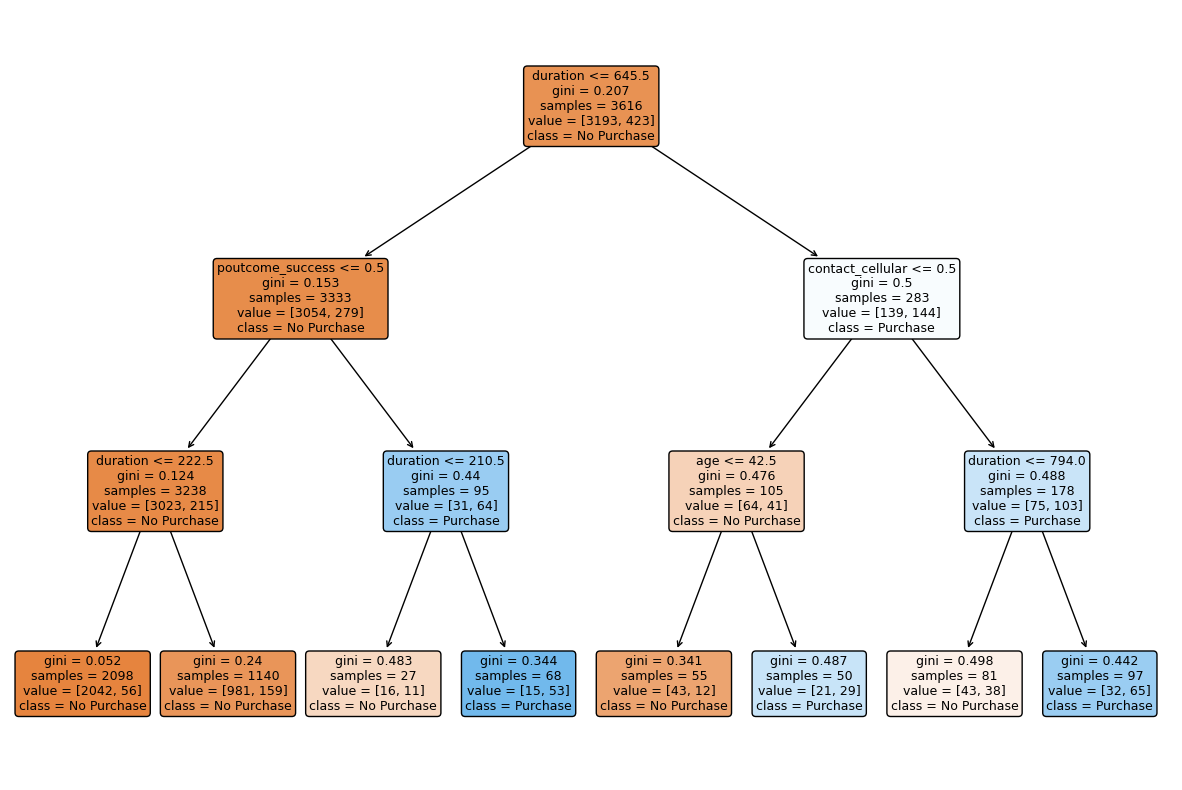

In [41]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))  # Adjust size as needed
feature_names = X_encoded.columns.tolist()  # Convert to list
plot_tree(clf, filled=True, feature_names=feature_names, rounded=True, fontsize=9, class_names=['No Purchase', 'Purchase'])
plt.show()
